# Identifying The Functional Status of Pumps in Tanzania

Water is one of the minimum need for human beings, it is not only used for our daily needs but also for agriculture and industrial purposes. Though	Tanzania has access	to a lot of water, the country still faces the dilemmas of many African	countries where	many areas have	no reliable	access to water. We	are	looking	at the dataset	of water pumps in Tanzania to predicting the operating condition of	a water point. Objective is to predict the status of Tanzanian water pumps. The water pumps are either of these three categories 
1. functional, 
2. non-functional, or 
3. functional but need repair. 
We have 40 predictor variables.Out of the 40 features in the data, we have 31 categorical variables, 7 numerical variables,	and	2 date variable.

This is a standard multi-class classification problem.

### Importing the required Libraries and setting up the Seaborn and Pandas Options

In [1]:
# Importing required packages
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Setting up Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# Setting up Seaborn
sns.set_style("whitegrid")
#sns.set_context("poster")

%matplotlib inline

In [2]:
#adding css class for better 
from IPython.core.display import HTML
css = open('data/style-table.css').read() + open('data/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Available data

__Training set values__ - The independent variables for the training set.
 __'data/4910797b-ee55-40a7-8668-10efd5c1b960.csv'__

__Training set Labels__ - The dependent variable (status_group) for each of the rows in Training set values.
 __'data/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv'__
    
__Test set values__ - The independent variables that need predictions.
 __'data/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv'__

__Submission format__ - The format for submitting your predictions.

In [3]:
#Importing the Data Sets

## Importing the Training set values.
training_values = pd.read_csv('data/4910797b-ee55-40a7-8668-10efd5c1b960.csv', encoding = 'iso-8859-1')

## Importing Features Data
training_lables = pd.read_csv('data/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv', encoding = 'iso-8859-1')

## Importing the Testing set values for validating the trained model.
test = pd.read_csv('data/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv', encoding = 'iso-8859-1')

> Let us now look at the Data, and try to understand the Features and data trends.

In [4]:
training_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


> Let us look at all the available Features or can be called as Data Dictionary.

In [5]:
list(training_values.columns.values)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

> __ Above are the available Features in our data set.__

__The Labels dataset contains the status of every Pump Observatin in the training dataset.__

In [6]:
training_lables.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


> Now, let us check the count of each fuctional type of the pumps in status_group so that we will under stand the functional scenario of the pumps.

In [7]:
training_lables.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

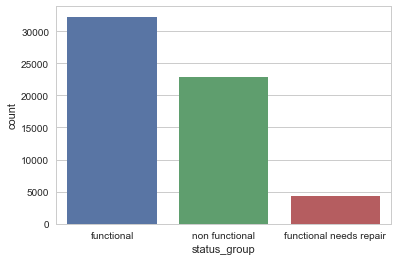

In [8]:
sns.countplot(training_lables['status_group'])

> This gives the no.of pumps which are in each condition. now lets find out the percentaage of the pumps in each condition type.

In [9]:
training_lables.status_group.value_counts()/len(training_lables.status_group)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

> __By the above result, we can say that 
there are 54.31% of Functional Pumps, 38.42% of non-functional fumpus and 7.27% of functional but which needs to be repaired.__

> __By the above figures, we can roughly estimate that there is 54.31% chance that if we take a random pump in the database to be a functional one.__

### __For the further analysis we will combine the training_values and training_lables, so that we can get the better insight of the data while exploring and wil also be easy to train.__

In [10]:
training_df = pd.merge(training_values, training_lables)

In [11]:
training_df.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### Before analyzing let us look at the training data we have and check if we have to clean anything.

> By looking at the above table we can, Most of the data available is categorial data. although lets make it sure.

In [12]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

### Dropping The Features With Similar Representation of Data

The	group of features of (extraction_type, extraction_type_group, extraction_type_class), (payment,	payment_type),	
(water_quality,	quality_group), (source, source_class),	(subvillage, region, region_code, district_code, lga, ward), and (waterpoint_type, waterpoint_type_group) all contain similar representation of	data in	different grains. Hence, we risk overfitting our data during training by including all the features	in our analysis.

* id can be droped because it is unique for each instance.
* num_private is ~99% zeros

In [13]:
training_df = training_df.drop(['id','source','wpt_name', 'num_private', 'region', 
          'quantity'],axis = 1)

training_df = training_df.drop(['quality_group','lga','ward','management', 'payment', 
           'extraction_type_group'], axis = 1)

In [14]:
training_df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,district_code,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_class,management_group,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,11,5,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,20,2,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,21,4,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,90,63,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,18,1,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### __Looking at the data, some of the features that seemed discriminative	based on human intuition. amount_tsh	(amount	of water available to water	point), gps_height,	basin, installer, population, scheme_management,	construction year, extraction_type, management_group, water_quality, payment type, source, and waterpoint_type seemed like they could be extremely important in	identifying the	pump status.__

> * __lets check if each Feature contains any null values or not.__

In [15]:
training_df.apply(lambda x: sum(x.isnull()))

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
basin                        0
subvillage                 371
region_code                  0
district_code                0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_class        0
management_group             0
payment_type                 0
water_quality                0
quantity_group               0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_group                 0
dtype: int64

> __There are null values in our features which are needeed to be updated for better training.__

I am starting with the Funder column and go one by one.

In [16]:
training_df.funder.value_counts().head(10)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: funder, dtype: int64

### __For features with high arity, let us keep the top 10 values, based on frequency	and	assig all the remaining	values to 11th synthetic value as “others”.__

In [17]:
def funder_cl(row):  
    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    elif row['funder']=='Kkkt':
        return 'Kkkt'
    elif row['funder']=='World Vision':
        return 'World Vision'
    elif row['funder']=='Unicef':
        return 'Unicef'
    elif row['funder']=='Tasaf':
        return 'Tasaf'
    elif row['funder']=='District Council':
        return 'District Council'
    else:
        return 'other'
    
training_df['funder'] = training_df.apply(lambda row: funder_cl(row), axis=1)

> __Addding new column named status_vals with values to allow it to use of a pivot table to check differences
 between the different funders.__


In [18]:
replace_values = {'functional':2, 'functional needs repair':1, 'non functional':0}
training_df['status_values']  = training_df.status_group.replace(replace_values)

### let us look at the data and check what are the number of pumps in each working condition, for every Funder. To achive this we need to create the Pivot table.

In [19]:
piv_table = pd.pivot_table(training_df,index=['funder','status_group'],
                           values='status_values', aggfunc='count')
piv_table

status_values
funder           status_group                          
District Council functional                         378
                 functional needs repair             45
                 non functional                     420
Kkkt             functional                         723
                 functional needs repair             66
                 non functional                     498
Tasaf            functional                         493
                 functional needs repair             64
                 non functional                     320
Unicef           functional                         600
                 functional needs repair             99
                 non functional                     358
World Vision     functional                         743
                 functional needs repair            131
                 non functional                     372
danida           functional                        1713
                 functional needs repair            159
                 non functional                    1242
gov              functional                        3720
                 functional needs repair            701
                 non functional                    4663
hesawa           functional                         936
                 functional needs repair            232
                 non functional                    1034
other            functional                       21603
                 functional needs repair           2614
                 non functional                   12750
rwssp            functional                         805
                 functional needs repair            109
                 non functional                     460
world_bank       functional                         545
                 functional needs repair             97
                 non functional                     707

### we have a pivot table that give detailed representation of no.of pumps in each status group Funded by each Funder, let us plot a Heat map and look at Status of the pumps graphically.

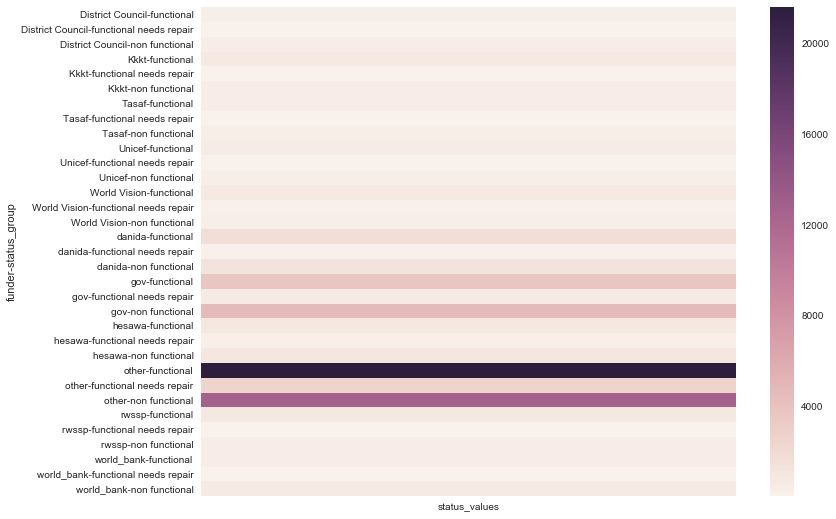

In [20]:
from matplotlib import pyplot
a4_dims = (12, 9)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(piv_table)

__Because There are More than 20,000 values we have filled with 'other', it is showing there are more functional and non-functional pumps and also pumps which are needed to be repaired.__

> __Now let us move to the Installer column and check for the value counts, to check which installer installed how many number of pumps?__

In [21]:
training_df.installer.value_counts().head(10)

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: installer, dtype: int64

### __As we have decided to keep the top 10 values, based on frequency	and	assign all the remaining values to 11th synthetic value as “others”.__

* For this I have used only 9 because the 8th funder name is recorded as 0 which otherwise states that the recorder has placed 0 in that column when he/she dosen't know the name of the funder. which also comes under unknown funder and we can change it to 'other'. 

In [22]:
def installer_cl(row):
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'
    elif row['installer']=='KKKT':
        return 'kkkt'
    elif row['installer']=='Hesawa':
        return 'hesawa'
    elif row['installer']=='TCRS':
        return 'tcrs'
    elif row['installer']=='Central government':
        return 'Central government'
    else:
        return 'other'  
training_df['installer'] = training_df.apply(lambda row: installer_cl(row), axis=1)

### let us look at the data and check what are the number of pumps in each workin condition, for every Installer. To achive this we need to create the Pivot table.

In [23]:
piv_table = pd.pivot_table(training_df,index=['installer','status_group'],
                           values='status_values', aggfunc='count')
piv_table

status_values
installer          status_group                          
Central government functional                         168
                   functional needs repair              4
                   non functional                     450
commu              functional                         724
                   functional needs repair             32
                   non functional                     304
danida             functional                         542
                   functional needs repair             83
                   non functional                     425
dwe                functional                        9433
                   functional needs repair           1622
                   non functional                    6347
gov                functional                         535
                   functional needs repair            256
                   non functional                    1034
hesawa             functional                         475
                   functional needs repair             17
                   non functional                     348
kkkt               functional                         422
                   functional needs repair             62
                   non functional                     414
other              functional                       19366
                   functional needs repair           2062
                   non functional                   12362
rwe                functional                         304
                   functional needs repair            137
                   non functional                     765
tcrs               functional                         290
                   functional needs repair             42
                   non functional                     375

### we have a pivot table that give detailed representation of no.of pumps in each status group instaled by each installer, let us plot a Heat map and look at Status of the pumps graphically.

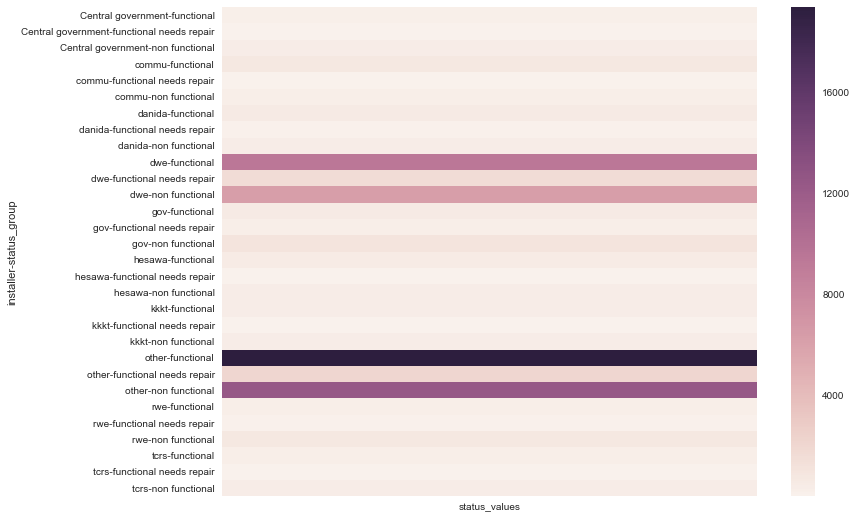

In [24]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(piv_table)

In [25]:
training_df.subvillage.value_counts().head(10)

Madukani    508
Shuleni     506
Majengo     502
Kati        373
Mtakuja     262
Sokoni      232
M           187
Muungano    172
Mbuyuni     164
Mlimani     152
Name: subvillage, dtype: int64

In [26]:
len(training_df.subvillage.value_counts())

19287

> __Looks like there are only 19287 out of 54,000 values let's fill the remaining instances with 'other'.__

In [27]:
training_df.subvillage = training_df.subvillage.fillna('other')
training_df.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

> __There are only two values in this column so, we can keep it and fill the null values to UNKNOWN.__

In [28]:
training_df.public_meeting = training_df.public_meeting.fillna('Unknown')

In [29]:
training_df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

### __As we have decided to keep the top 10 values, based on frequency	and	assign all the remaining values to 11th synthetic value as “others”.__

In [30]:
def scheme_cl(row):
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    elif row['scheme_management']=='Parastatal':
        return 'Parastatal'
    elif row['scheme_management']=='Private operator':
        return 'pri_optr'
    elif row['scheme_management']=='SWC':
        return 'swc'
    elif row['scheme_management']=='Company':
        return 'company'
    elif row['scheme_management']=='Trust':
        return 'trust'
    else:
        return 'other'
training_df['scheme_management'] = training_df.apply(lambda row: scheme_cl(row), axis=1)

### let us look at the data and check what are the number of pumps in each working condition, under each scheme management group. To achive this we need to create the Pivot table.

In [31]:
piv_table = pd.pivot_table(training_df, index=['scheme_management', 'status_group'],
                           values='status_values', aggfunc='count')
piv_table

status_values
scheme_management status_group                          
Parastatal        functional                         966
                  functional needs repair            202
                  non functional                     512
company           functional                         534
                  functional needs repair             37
                  non functional                     490
other             functional                        2332
                  functional needs repair            245
                  non functional                    2067
pri_optr          functional                         729
                  functional needs repair             23
                  non functional                     311
swc               functional                          20
                  functional needs repair              1
                  non functional                      76
trust             functional                          46
                  functional needs repair              5
                  non functional                      21
vwc               functional                       18960
                  functional needs repair           2334
                  non functional                   15499
wtr_auth          functional                        1618
                  functional needs repair            448
                  non functional                    1087
wtr_brd           functional                        2053
                  functional needs repair            111
                  non functional                     584
wua               functional                        1995
                  functional needs repair            239
                  non functional                     649
wug               functional                        3006
                  functional needs repair            672
                  non functional                    1528

### __we have a pivot table that give detailed representation of no.of pumps in each status group are under which scheme management, let us plot a Heat map and look at Status of the pumps graphically.__

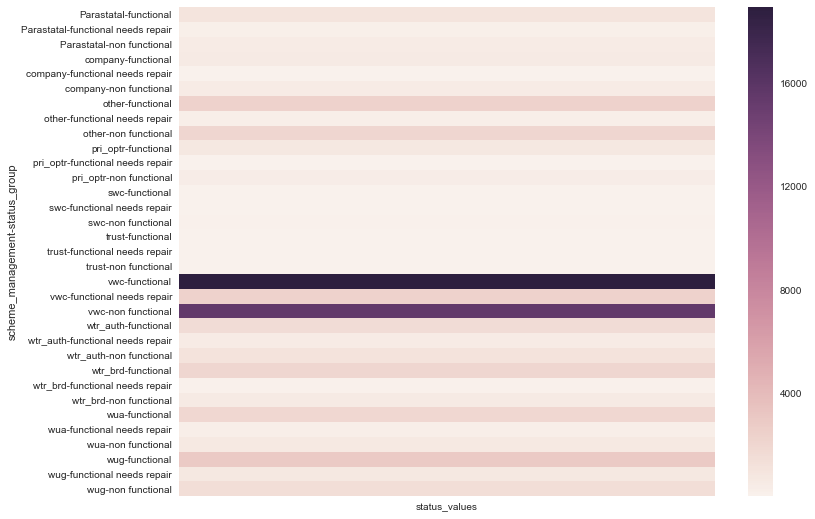

In [32]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(piv_table)

In [33]:
training_df.scheme_name.value_counts().head(10)

K                              682
None                           644
Borehole                       546
Chalinze wate                  405
M                              400
DANIDA                         379
Government                     320
Ngana water supplied scheme    270
wanging'ombe water supply s    261
wanging'ombe supply scheme     234
Name: scheme_name, dtype: int64

In [34]:
len(training_df.scheme_name.unique())

2697

In [35]:
training_df.scheme_name = training_df.scheme_name.fillna('other')

In [36]:
training_df.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [37]:
training_df.permit = training_df.permit.fillna('Unknown')

> checking if there are any null values left 

In [38]:
training_df.apply(lambda x: sum(x.isnull()))

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region_code              0
district_code            0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_class    0
management_group         0
payment_type             0
water_quality            0
quantity_group           0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
status_values            0
dtype: int64

> None of the columns have the null values.

In [39]:
##lets check the data types again.
cols = training_df.select_dtypes(include = ['object'])
cols.apply(lambda x: len(x.unique()))

date_recorded              356
funder                      11
installer                   10
basin                        9
subvillage               19288
public_meeting               3
recorded_by                  1
scheme_management           11
scheme_name               2697
permit                       3
extraction_type             18
extraction_type_class        7
management_group             5
payment_type                 7
water_quality                8
quantity_group               5
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

> Converting all the Date and time related columns to Date_time objects

In [40]:
## changing the construction year to numeric value

training_df.construction_year = pd.to_numeric(training_df.construction_year)
training_df.construction_year.value_counts()
## There are 20709 instances with out a year so let us fill the values with median of the column

training_df['construction_year'].median()

1986.0

> __The median of the construction_year column is 1986, so I am filling the missing datafields with 1986__

In [41]:
training_df.loc[training_df.construction_year <= 0, training_df.columns=='construction_year'] = 1986

In [42]:
## Converting operation time into date-time object

training_df['operation_time']=training_df.date_recorded.apply(pd.to_datetime)-training_df.construction_year.apply(lambda x: pd.to_datetime(x,format='%Y'))

> __converting the datatime into categorical as in :  '60s', '70s', '80s', '90s, '00s', '10s', 'unknown'. which dosent have any year value for our convinience__

In [43]:
def construction_cl(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
training_df['construction_year'] = training_df.apply(lambda row: construction_cl(row), axis=1)

In [44]:
## Converting the Month column into date time object.
training_df['month']=pd.to_datetime(training_df.date_recorded).dt.month

In [45]:
training_df.date_recorded = pd.to_datetime(training_df.date_recorded)
training_df.date_recorded.describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

> __let us try to add a new column named data_since_recorded (which is obtained from subratcting date_recorded from latest recorded date) so that we get a new column which contains no. of days since recorded. The most recent data is 2013-12-03. Subtract each date from this point to obtain a 'days_since_recorded' column.__

In [46]:
training_df.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(training_df.date_recorded)
training_df.columns = ['days_since_recorded' if x=='date_recorded' else x for x in training_df.columns]
training_df.days_since_recorded = training_df.days_since_recorded.astype('timedelta64[D]').astype(int)
training_df.days_since_recorded.describe()

count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [47]:
## basin
training_df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

### let us look at the data and check what are the number of pumps in each working condition are under each basin. To achive this we need to create the Pivot table.

In [48]:
piv_table = pd.pivot_table(training_df, index=['basin', 'status_group'],
                           values=['status_values'], aggfunc='count')
piv_table

status_values
basin                   status_group                          
Internal                functional                        4482
                        functional needs repair            557
                        non functional                    2746
Lake Nyasa              functional                        3324
                        functional needs repair            250
                        non functional                    1511
Lake Rukwa              functional                        1000
                        functional needs repair            270
                        non functional                    1184
Lake Tanganyika         functional                        3107
                        functional needs repair            742
                        non functional                    2583
Lake Victoria           functional                        5100
                        functional needs repair            989
                        non functional                    4159
Pangani                 functional                        5372
                        functional needs repair            477
                        non functional                    3091
Rufiji                  functional                        5068
                        functional needs repair            437
                        non functional                    2471
Ruvuma / Southern Coast functional                        1670
                        functional needs repair            326
                        non functional                    2497
Wami / Ruvu             functional                        3136
                        functional needs repair            269
                        non functional                    2582

### __we have a pivot table that give detailed representation of no.of pumps in each status group are under which basin, let us plot a Heat map and look at Status of the pumps graphically.__

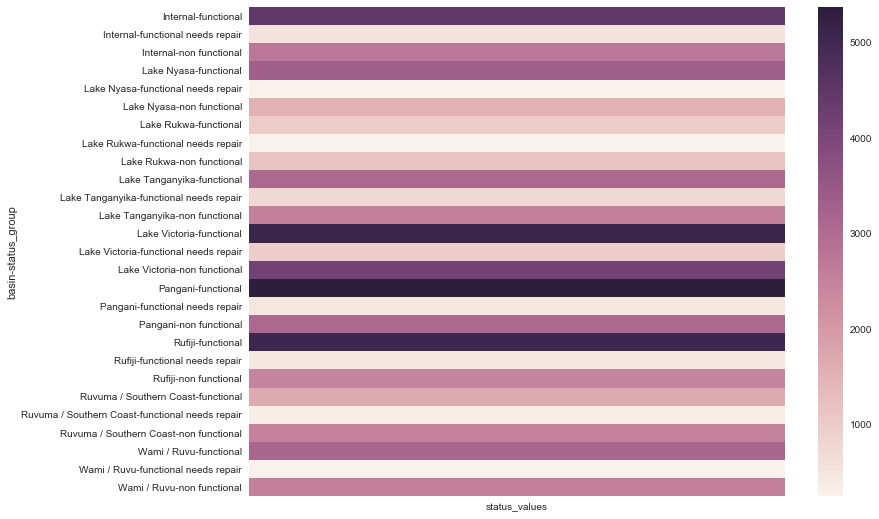

In [49]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.heatmap(piv_table)

> __Looks like basin is one of the most important feature of the dataset.__

In [50]:
training_df.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

> __looks like every record is recorded by GeoData and it dosen't influence more on our model so we can drop it.__

In [51]:
training_df= training_df.drop('recorded_by', axis=1)

In [52]:
training_df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [53]:
training_df.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

> __Keep 1 and delete the remaining as we decided earlier.__

In [54]:
training_df = training_df.drop(['extraction_type'], axis=1)

In [55]:
training_df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [56]:
## almost all are managed by user-group we can drop it
training_df = training_df.drop(['management_group'], axis=1)

In [57]:
training_df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [58]:
training_df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [59]:
## We can drop the location data which migh not influence on the model
training_df = training_df.drop(['longitude', 'latitude', 'region_code', 'district_code'], axis=1)

In [60]:
## Dropping the status_values, operation_time, month which are added for the caluculations.
training_df = training_df.drop(['status_values','operation_time','month'], axis=1)

### As we have worked on our Training data set and performed some data wrangling, we have to perform the same operations on our test data set to make our modeling easier.

In [61]:
test = test.drop(['longitude', 'latitude', 'region_code', 'district_code',
                  'num_private', 'id', 'payment', 'management_group', 'management', 
                  'extraction_type', 'extraction_type_group', 'recorded_by','region', 'lga',
                  'ward', 'wpt_name', 'quantity',
                 'quality_group', 'source'], axis=1)

In [62]:
##cleaning the columns as the training data set
test.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test.date_recorded)
test.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test.columns]
test.days_since_recorded = test.days_since_recorded.astype('timedelta64[D]').astype(int)

In [63]:
test.permit = test.permit.fillna('Unknown')
test.public_meeting = test.public_meeting.fillna('Unknown')

In [64]:
test['scheme_management'] = test.apply(lambda row: scheme_cl(row), axis=1)
test['construction_year'] = test.apply(lambda row: construction_cl(row), axis=1)
test['installer'] = test.apply(lambda row: installer_cl(row), axis=1)
test['funder'] = test.apply(lambda row: funder_cl(row), axis=1)

In [65]:
training_df.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,subvillage,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,995,other,1390,other,Lake Nyasa,Mnyusi B,109,True,vwc,Roman,False,90s,gravity,annually,soft,enough,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,272,other,1399,other,Lake Victoria,Nyamara,280,Unknown,other,other,True,10s,gravity,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,281,other,686,other,Pangani,Majengo,250,True,vwc,Nyumba ya mungu pipe scheme,True,00s,gravity,per bucket,soft,enough,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,309,Unicef,263,other,Ruvuma / Southern Coast,Mahakamani,58,True,vwc,other,True,80s,submersible,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,874,other,0,other,Lake Victoria,Kyanyamisa,0,True,other,other,True,80s,gravity,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [66]:
test.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,basin,subvillage,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type_class,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0.0,302,other,1996,other,Internal,Magoma,321,True,Parastatal,NaN,True,10s,other,never pay,soft,seasonal,rainwater harvesting,surface,other,other
1,0.0,302,gov,1569,dwe,Pangani,Kimnyak,300,True,vwc,TPRI pipe line,True,00s,gravity,never pay,soft,insufficient,spring,groundwater,communal standpipe,communal standpipe
2,0.0,305,other,1567,other,Internal,Msatu,500,True,vwc,P,Unknown,10s,other,never pay,soft,insufficient,rainwater harvesting,surface,other,other
3,0.0,315,other,267,other,Ruvuma / Southern Coast,Kipindimbi,250,Unknown,vwc,NaN,True,80s,other,unknown,soft,dry,shallow well,groundwater,other,other
4,500.0,251,other,1260,other,Ruvuma / Southern Coast,Losonga,60,Unknown,wtr_brd,BRUDER,True,00s,gravity,monthly,soft,enough,spring,groundwater,communal standpipe,communal standpipe


### Now that we have cleaned our training and test datasets, export the datasets to csv files so that we can use it for fitting into our model.

In [67]:
training_df.to_csv('training_data.csv', index=True)
training_df.shape

(59400, 22)

In [68]:
test.to_csv('test_data.csv', index=True)
test.shape

(14850, 21)